In [4]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

import h5py
from bloch import *

from scipy.integrate import quad

In [2]:
filename = "Bloch-V=10.0_k=3.142_num-basis=61_num-q=100.hdf5"
# filename = "Bloch-V=4.0_k=3.142_num-basis=21_num-q=100.hdf5"
with h5py.File(filename, "r") as f:
    V0, kl, l_max, num_q = f["Parameters"]
    E = f["E"][:]
    psi = f["psi"][:]
    q = f["q"][:]

In [3]:
blochs = [func_bloch(psi, i, 0, kl, l_max) for i in range(len(q))]
wannier = func_wannier(blochs, q, 0)

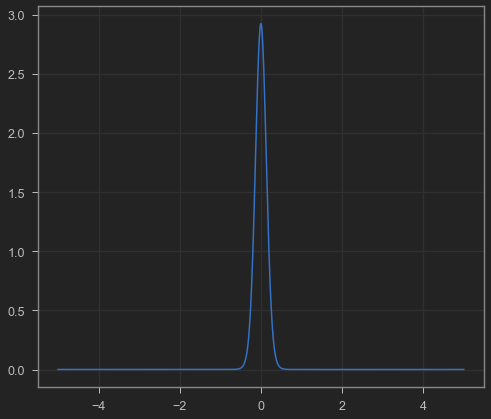

In [7]:
x = np.linspace(-5, 5, 1001)
plt.plot(x, np.abs(np.vectorize(wannier)(x))**2)

In [5]:
quad(lambda x: np.abs(blochs[0](x))**2, -0.5, 0.5)[0], quad(lambda x: np.abs(wannier(x))**2, -10, 10)[0]

(1.0000294934234513, 1.0019293736660284)

In [6]:
# # wannier func at R = 0, discrete bloch values for first band
# def tunneling_1D(wannier, Ri, Rj, bloch_fns, bloch_energy, k, lims):
#     def integrand(x):
#         bloch_vals = np.array([fn(x) for fn in bloch_fns])
#         return np.conj(wannier(x - Ri)) * 1/np.sqrt(len(k)) * np.sum(bloch_energy * bloch_vals * np.exp(1j * k * (x - Rj)), axis = 0)
            
#     norm = quad(lambda x: np.conj(wannier(x - Ri)) * wannier(x - Rj), *lims)[0]

#     return - quad(integrand, *lims)[0] / norm

def tunneling_1D(Ri, Rj, bloch_energy, k): 
    return -1/len(k) * np.real(np.sum(bloch_energy * np.exp(-1j * k * (Rj - Ri))))

In [8]:
tunneling_1D(1, 1, E[:, 0], q)

-2.885228689668976

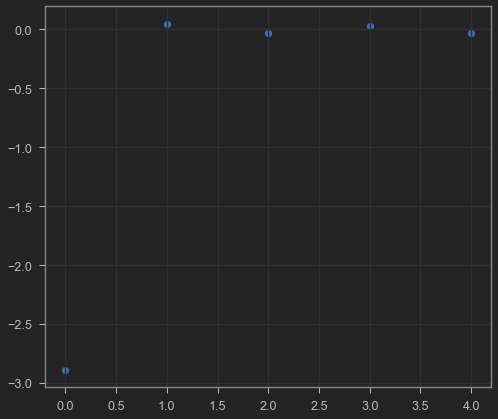

In [22]:
diff = range(5)
vals = [tunneling_1D(0, i, E[:, 0], q) for i in diff]
plt.scatter(diff, vals)

In [44]:
from scipy.fft import fft, fftfreq, fftshift, ifftshift

In [79]:
N = len(q)

wannier = func_wannier(blochs, q, 0)

x = np.linspace(-10., 10., N, endpoint=False)
y = ifftshift(np.conj(np.vectorize(wannier)(x)) * np.vectorize(wannier)(x - 1))

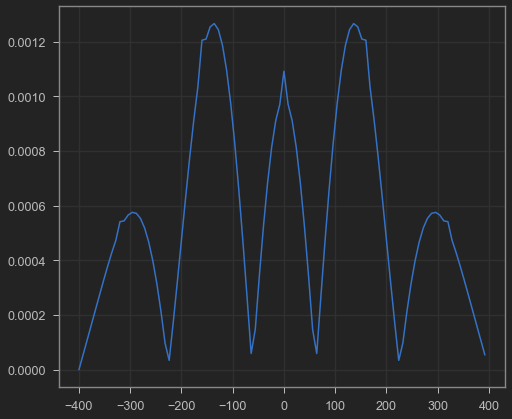

In [80]:
yf = fftshift(fft(y))
xf = fftshift(fftfreq(N, T))

plt.plot(xf, 1.0/N * np.abs(yf))
